In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd_dict = {
    
    'name':['VizgenBrain','VizgenLiver','Zhang Nature 2021','Chen Nat Neurosci 2021','Moffitt Nat Neurosci 2018','Chen Cell 2022','Chen Cell Rep 2021','Biermann Cell 2022','Marshall Iscience 2022'],
    'biotech':['MERSCOPE','MERSCOPE','MERFISH','MERFISH','MERFISH','Stereo-seq','Slide-seqV2','Slide-seqV2','Slide-seqV2'],
    'nCells':[734696,1175479,280327,720037,1027848,4774048,207335,460206,887931],
    'nSlices':[9,4,64,27,181,55,6,16,42],
    
}

In [4]:
pd_df = pd.DataFrame(pd_dict)

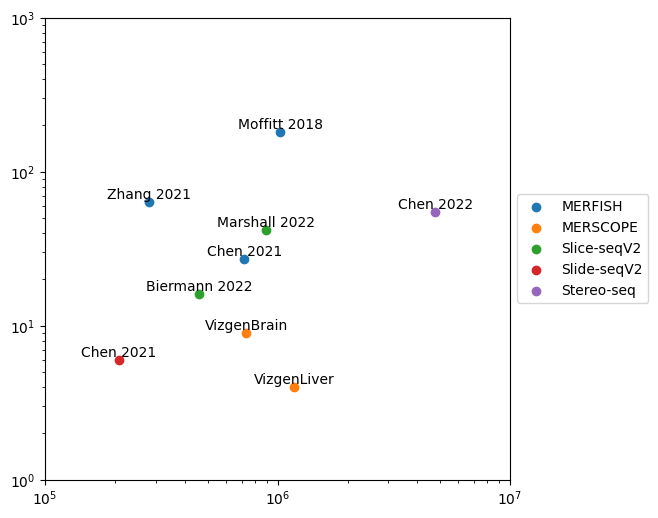

In [21]:
import pandas as pd
import matplotlib.pyplot as plt



grouped = pd_df.groupby('biotech')

# Create a square shape
fig, ax = plt.subplots(figsize=(6, 6))

# Cycle through each group
for name, group in grouped:
    plt.scatter(group['nCells'], group['nSlices'], label=name)

    # Label the name of each point
    for x, y, name in zip(group['nCells'], group['nSlices'], group['name']):
        # plt.text(x, y, name)
        plt.text(x, y, name, ha='center', va='bottom')



# Add Legend
plt.legend()
plt.xscale('log')
plt.yscale('log')
# Mark 10 to the power of 10 on the logarithmic coordinate axis
plt.xticks([100000,1000000,10000000], [ '10$^5$','10$^6$','10$^7$'])
plt.yticks([1, 10, 100,1000], ['10$^0$', '10$^1$', '10$^2$','10$^3$'])
# show figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


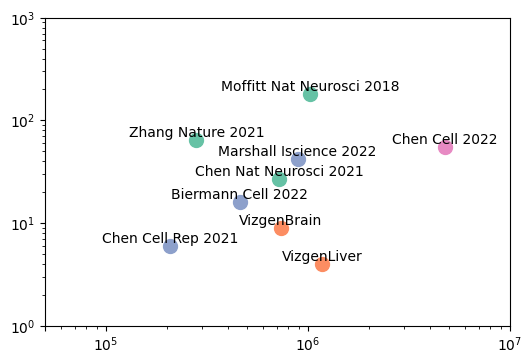

In [42]:
# Create a palette
palette = sns.color_palette('Set2')

# Group by biotech
grouped = pd_df.groupby('biotech')

# Create a square shape
fig, ax = plt.subplots(figsize=(6, 4))

# Cycle through each group
for i, (name, group) in enumerate(grouped):
    plt.scatter(group['nCells'], group['nSlices'], label=name, color=palette[i],s=100)

    # Label the name of each point
    for x, y, name in zip(group['nCells'], group['nSlices'], group['name']):
        plt.text(x, y, name, ha='center', va='bottom')

# Set both horizontal and vertical coordinates to the logarithmic axis
plt.xscale('log')
plt.yscale('log')

# Mark 10 to the power of 10 on the logarithmic coordinate axis
plt.xticks([50000,100000, 1000000, 10000000], ['','10$^5$', '10$^6$', '10$^7$'])
plt.yticks([1, 10, 100, 1000], ['10$^0$', '10$^1$', '10$^2$', '10$^3$'])

# Place the legend outside the drawing
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# show figure
# plt.show()
plt.savefig('figures/largedata_wolegned.pdf',bbox_inches='tight',transparent=True)

In [2]:
adata = sc.read_h5ad('/home/yzy/PUBDT/MERFISH/Vizgen_liver/h5ad/joint_cls.h5ad')

In [4]:
adata.obs['slice_id']

10482024599960584593741782560798328923-0     Liver1Slice1
111551578131181081835796893618918348842-0    Liver1Slice1
11173636076188568650971531877509781259-0     Liver1Slice1
11416753689349644427802751550871278871-0     Liver1Slice1
116320174062690702928590241926360429752-0    Liver1Slice1
                                                 ...     
8829987192953007550093048509424403861-3      Liver2Slice2
8835374807117791705559879232891538925-3      Liver2Slice2
89781679685113922121833241447564851536-3     Liver2Slice2
92911647133981107460634270325756023502-3     Liver2Slice2
99875339714459420056683843321264513986-3     Liver2Slice2
Name: slice_id, Length: 1175479, dtype: category
Categories (4, object): ['Liver1Slice1', 'Liver1Slice2', 'Liver2Slice1', 'Liver2Slice2']

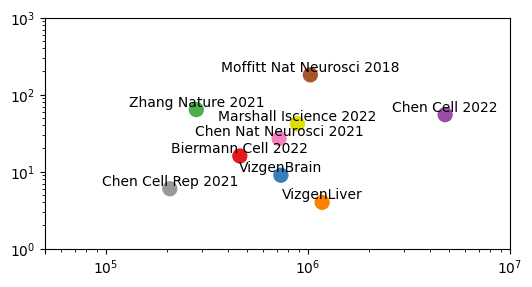

In [12]:
import seaborn as sns

palette = sns.color_palette(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

fig, ax = plt.subplots(figsize=(6, 3))

# Draw each point
plt.scatter(pd_df['nCells'], pd_df['nSlices'], color=palette, s=100)

# Label the name of each point
for x, y, name in zip(pd_df['nCells'], pd_df['nSlices'], pd_df['name']):
    plt.text(x, y, name, ha='center', va='bottom')

# Set both horizontal and vertical coordinates to the logarithmic axis
plt.xscale('log')
plt.yscale('log')

# Mark 10 to the power of 10 on the logarithmic coordinate axis
plt.xticks([50000,100000, 1000000, 10000000], ['','10$^5$', '10$^6$', '10$^7$'])
plt.yticks([1, 10, 100, 1000], ['10$^0$', '10$^1$', '10$^2$', '10$^3$'])

# show figure
plt.savefig('figures/largedata_wolegned.pdf',bbox_inches='tight',transparent=True)


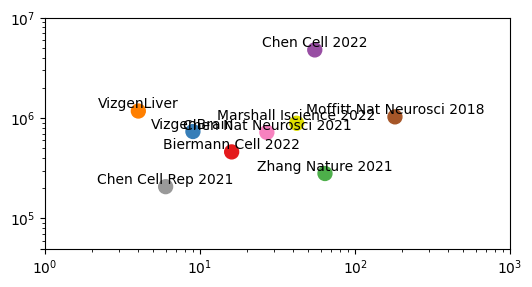

In [11]:
import seaborn as sns

palette = sns.color_palette(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

fig, ax = plt.subplots(figsize=(6, 3))

plt.scatter( pd_df['nSlices'], pd_df['nCells'],color=palette, s=100)

for x, y, name in zip( pd_df['nSlices'], pd_df['nCells'],pd_df['name']):
    plt.text(x, y, name, ha='center', va='bottom')

plt.xscale('log')
plt.yscale('log')

plt.yticks([50000,100000, 1000000, 10000000], ['','10$^5$', '10$^6$', '10$^7$'])
plt.xticks([1, 10, 100, 1000], ['10$^0$', '10$^1$', '10$^2$', '10$^3$'])

plt.savefig('figures/largedata_wolegned.pdf',bbox_inches='tight',transparent=True)
